
# Project Final Report
## Evaluation of the Canny Edge Detection

### Introduction

The Canny edge detection algorithm was developed by John F. Canny in 1986. It is a multistage algorithm that is used to detect edges in an image. Edge detection allows object separation and shape detection, making it important in image processing programs. The traditional Canny Edge detection is wide used in gray image processing. [3] 

#### Steps of Canny's Edge Detection
1. Smoothing an image and noise reduction via a Gaussian Filter  
2. Find the Intensity Gradients of the Image via a Sobel Kernel
3. Non-Maximum Suppression 
4. Double Thresholding and Edge Tracking By Hyperesis

#### Functions Used Later on For the Algorithm

In [30]:
%matplotlib inline
import numpy as np
import cv2
import pandas as pd
from scipy import ndimage
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont


# Performs Non-Maximum Suppression
def nonMaxSuppression(angles, mag):
    M, N = angles.shape
    nms = np.zeros((M, N), dtype=np.uint8)  # data type unsigned integer
    angles = angles * 180 / np.pi
    for i in range(M - 1):
        for j in range(N - 1):
            K = mag[i, j]

            # Horizontal Edge
            if -22.5 <= angles[i, j] < 22.5 or -157.5 >= angles[i, j] or 157.5 <= angles[i, j]:
                neighbor1 = mag[i, j + 1]
                neighbor2 = mag[i, j - 1]

            # -45 Edge
            elif 22.5 <= angles[i, j] <= 67.5 or -112.5 >= angles[i, j] > -157.5:
                neighbor1 = mag[i + 1, j - 1]
                neighbor2 = mag[i - 1, j + 1]

            # Vertical Edge
            elif 67.5 <= angles[i, j] < 112.5 or -67.5 >= angles[i, j] > -112.5:
                neighbor1 = mag[i + 1, j]
                neighbor2 = mag[i - 1, j]

            # 45 Edge
            elif 112.5 <= angles[i, j] < 157.5 or -22.5 >= angles[i, j] > -67.5:
                neighbor1 = mag[i - 1, j - 1]
                neighbor2 = mag[i + 1, j + 1]

            if K < neighbor1 or K < neighbor2:
                nms[i, j] = 0
            else:
                nms[i, j] = K
                
    return nms

# Performs Double-Threshold Technique and Hysteresis
def doubleThreshold(angles, mag, higher, lower):
    higherThreshold = mag.max() * higher
    lowerThreshold = mag.max() * lower
    M, N = angles.shape
    g_nh = np.zeros((M, N), dtype=np.uint8)
    g_nl = np.zeros((M, N), dtype=np.uint8)

    for i in range(M):
        for j in range(N):
            if mag[i, j] >= higherThreshold:
                g_nh[i, j] = mag[i, j]
            else:
                g_nh[i, j] = 0

    for i in range(M):
        for j in range(N):
            if mag[i, j] >= lowerThreshold:
                g_nl[i, j] = mag[i, j]
            else:
                g_nl[i, j] = 0
    g_nl = g_nl - g_nh

    g_nl_strong = np.zeros((M, N), dtype=np.uint8)
    
    #hysteresis part
    for i in range(1, M):   
        for j in range(1, N):
            if g_nh[i, j] != 0:
                # 8 neighborhood 
                if g_nl[i - 1, j + 1] != 0:
                    g_nh[i - 1, j + 1] = g_nl[i - 1, j + 1]
                if g_nl[i, j + 1] != 0:
                    g_nh[i, j + 1] = g_nl[i, j + 1]
                if g_nl[i + 1, j + 1] != 0:
                    g_nh[i + 1, j + 1] = g_nl[i + 1, j + 1]
                if g_nl[i - 1, j] != 0:
                    g_nh[i - 1, j] = g_nl[i - 1, j]
                if g_nl[i + 1, j] != 0:
                    g_nh[i + 1, j] = g_nl[i + 1, j]
                if g_nl[i - 1, j - 1] != 0:
                    g_nh[i - 1, j - 1] = g_nl[i - 1, j - 1]
                if g_nl[i, j - 1] != 0:
                    g_nh[i, j - 1] = g_nl[i, j - 1]
                if g_nl[i + 1, j - 1] != 0:
                    g_nh[i + 1, j - 1] = g_nl[i + 1, j - 1]
            else:
                g_nl_strong[i, j] = 0
    return g_nh, g_nl



## Canonical Test Data Generated

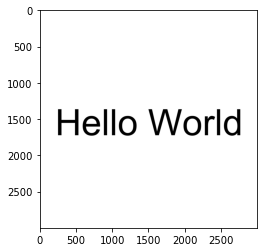

In [31]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont

testimg=Image.new('RGB',(3000,3000),'white')
str1= "Hello World"

font=ImageFont.truetype("arial.ttf",500)
w,h=font.getsize(str1)

draw=ImageDraw.Draw(testimg)
draw.text(((3000-w)/2,(3000-h)/2),str1, font=font, fill="black")

plt.imshow(testimg)
testimg = testimg.save(r'C:\Users\wsven\Downloads\test.jpg')
    



Generated a 3000x3000 .jpg image that displays "Hello World" to be used for testing.

### Process
#### 1. Noise Reduction
The first step in this edge detection is to remove the noise in an image by applying a blurring filter. This step is important because this noise can be mistaken for edges. A gaussian filter is the one mainly used in Canny Edge Detection. [2]

There can be many different sizes used for a Gaussian Kernel, with the size of the kernel being directly proportional to how much the image will be blurred. 

Gaussian Kernel Equation:
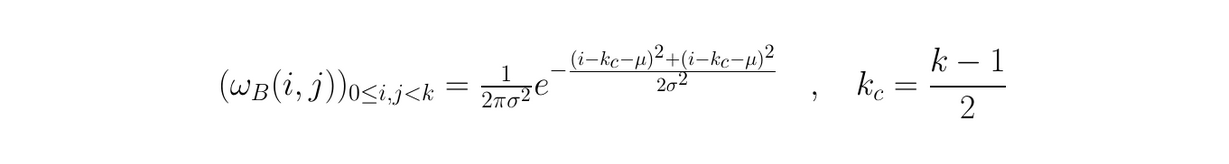

Below a 13x13, 49x49, and a 97x97 Gaussian kernel is applied to the generated image. As shown, the strength of the blur is directly proportional to the size of the kernel. 

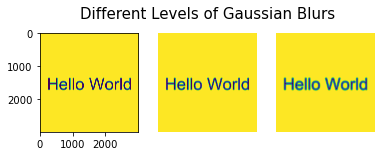

Wall time: 846 ms


In [32]:
%%time
# Step 1 Grayscale and Perform Gaussian Blur three different times
img = cv2.imread(r'C:\Users\wsven\Downloads\test.jpg', 0)  # insert image and converts to grayscale with 0 value
img = img.astype(np.float32)
blurred_2 = cv2.GaussianBlur(img, (13, 13), 0)
blurred_8 = cv2.GaussianBlur(img, (49, 49), 0)
blurred_16 = cv2.GaussianBlur(img, (97, 97), 0)


plt.subplot(1,3,1)
plt.imshow(blurred_2,) 
plt.subplot(1,3,2)
plt.title(label="Different Levels of Gaussian Blurs",fontsize=15, loc = 'center', pad = 15)
plt.imshow(blurred_8)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(blurred_16)
plt.axis('off')

plt.show()

#### 2. Find the Intensity Gradients of the Image via a Sobel Kernel

After applying the Gaussian Filter on the image to remove the noise, we would have to filter the smoothened image with a Sobel Kernel. This is done in both the horizontal (Gx) and Vertical (Gy) direction. Once this is done, it's possible to find the edge gradient and direction for each pixel. 

The easiest method used to detect the change in pixel's intensity is to apply filters in both the vertical and horizontal direction. This intensity derivative Ix and Iy is calculated when the image is smoothed, Gx and Gy can be calculated by convulving Ix and Iy with Kx and Ky respectively. Afterwards the magnitude G and the slope Theta are typically found. [4]

\begin{equation}
Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)
\end{equation}



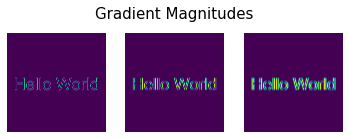

Wall time: 1.06 s


In [33]:
%%time
#Step 2 Find the Intensity Gradients of the Image via a Sobel Kernel
# Computes Gradient Magnitude and Angle of Blurred Images
# Obtain the gradient kernels for x and y directions
kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Compute the Gradient Magnitudes
gx_2 = ndimage.convolve(blurred_2, kx)
gy_2 = ndimage.convolve(blurred_2, ky)
edge_2 = np.hypot(gx_2, gy_2)

gx_8 = ndimage.convolve(blurred_8, kx)
gy_8 = ndimage.convolve(blurred_8, kx)
edge_8 = np.hypot(gx_8, gy_8)

gx_16 = ndimage.convolve(blurred_16, kx)
gy_16 = ndimage.convolve(blurred_16, kx)
edge_16 = np.hypot(gx_16, gy_16)


plt.subplot(1,3,1)
plt.imshow(edge_2) 
plt.axis('off')
plt.subplot(1,3,2)
plt.title(label="Gradient Magnitudes",fontsize=15, loc = 'center', pad = 15)
plt.imshow(edge_8)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(edge_16)
plt.axis('off')
plt.show()

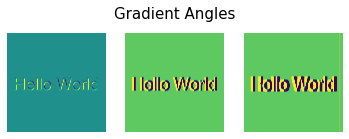

Wall time: 768 ms


In [34]:
%%time
# Compute the Gradient Angle
theta_2 = np.arctan2(gy_2, gx_2)
theta_8 = np.arctan2(gy_8, gx_8)
theta_16 = np.arctan2(gy_16, gx_16)

plt.subplot(1,3,1)
plt.imshow(theta_2)
plt.axis('off')
plt.subplot(1,3,2)
plt.title(label ="Gradient Angles",fontsize=15, loc = 'center', pad = 15)
plt.imshow(theta_8) 
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(theta_16)
plt.axis('off')
plt.show()

#### 3. Non-Maximum Suppression

In the prior step, the depictions left us with images that have a thick outline. Ideally the final image should have thin lines that outline the edges. The next step, Non-Maximum Suppression is used to thin out the edges. 

The way non-maximal suppression works is that it looks at the angles of the edges by taking the arctan of the x-component and y-component. The pixel's value is seen and if it is non-maximal in a line tangential to its edge angle, it can be removed from the edge map. [1] This is implemented by splitting the edge direction into an 8 point compass. When the edge is in the horizontal direction, it's ideal to compare the top and bottom pixels. If it is in the vertical direction then compare the left and right direction and if the edge points north west or south east, compare the the top right and bottom left pixels. Alternatively, compare the bottom right and top left pixels. [4]



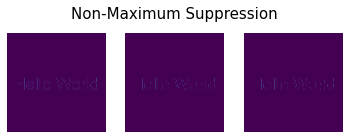

Wall time: 2min 1s


In [35]:
%%time
#Step3 - Non-Maximum Suppression 
# Computes Non-Maximum Suppression for each edge layer
g_n_2 = nonMaxSuppression(theta_2, edge_2)
g_n_8 = nonMaxSuppression(theta_8, edge_8)
g_n_16 = nonMaxSuppression(theta_16, edge_16)

plt.subplot(1,3,1)
plt.imshow(g_n_2)
plt.axis('off')
plt.subplot(1,3,2)
plt.title(label ="Non-Maximum Suppression",fontsize=15, loc = 'center', pad = 15)
plt.imshow(g_n_8) 
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(g_n_16)
plt.axis('off')
plt.show()


After the Non-Maximum suppression, the edges for each figure is shown to have thinned out. 

#### 4. Double Thresholding & Hyperesis Edge Tracking

After the Non-Maximum Suppression step, the edge-pixels that remain are still marked with their strength pixel by pixel. The majority of these will be true edges in the image. A threshold is used to discern between the ones that should be considered an edge pixel or not. This will make it so only the edges stronger than a certain value will be perserved. Canny's edge detection uses a double thresholding method. This means that edge pixels stronger than the high threshold are marked as strong, and edge pixels below the low threshold are classified as weak. [4]

After performing the double threshold step to classify each edge pixel as strong or weak, based on the results, the hysteresis step consists of transforming weak pixels into strong ones. This of course has a condition, a weak edge pixel is transformed to a strong pixel if and only atleast one of it's neighboring edge pixels is classified as a strong edge pixel, otherwise it is discarded. [1]

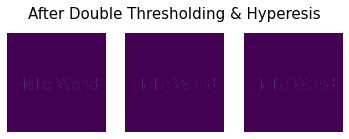

Wall time: 2min 37s


In [36]:
%%time
# Step 4  - Double Thresholding and Edge Tracking by Hyperesis
dt_2, nl_2 = doubleThreshold(theta_2, g_n_2, 0.3, 0.15)
dt_8, nl_8 = doubleThreshold(theta_8, g_n_8, 0.3, 0.15)
dt_16, nl_16 = doubleThreshold(theta_16, g_n_16, 0.3, 0.15)

plt.subplot(1,3,1)
plt.imshow(dt_2)
plt.axis('off')
plt.subplot(1,3,2)
plt.title(label ="After Double Thresholding & Hyperesis",fontsize=15, loc = 'center', pad = 15)
plt.imshow(dt_8) 
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(dt_16)
plt.axis('off')
plt.show()

#### 5. Final Image Combined from the 3 Layers

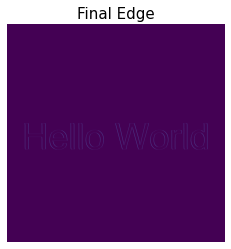

In [37]:
# Combines 3 layers of different sigma values and sized kernels into one image 
final_edge = np.concatenate((dt_2[..., np.newaxis], dt_8[..., np.newaxis], dt_16[..., np.newaxis]), axis=2)
final_edge = cv2.cvtColor(final_edge, cv2.COLOR_BGR2GRAY)

plt.imshow(final_edge)
plt.title(label="Final Edge", fontsize = 15)
plt.axis('off')
plt.show()

After looking processing the 3 figures of different kernel sizes, they were concatenated into one image. 

### The Algorithm Script 

Wall time: 1min 11s


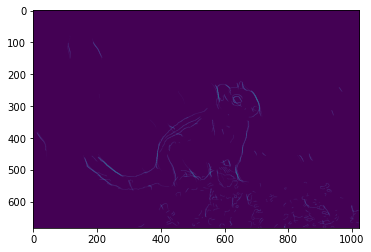

In [58]:
%%time 
#input is a cv2 read image with and converted to grayscale
def canny(img): 
    # Step 1 Grayscale and Perform Gaussian Blur three different times with different sigma values  
    img = img.astype(np.float32) #O(1)
    blurred_2 = cv2.GaussianBlur(img, (13, 13), 0)  #O(nmlognm)
    blurred_8 = cv2.GaussianBlur(img, (49, 49), 0)   #O(nmlognm)
    blurred_16 = cv2.GaussianBlur(img, (97, 97), 0)   #O(nmlognm)


    #Step 2 Find the Intensity Gradients of the Image via a Sobel Kernel
    # Computes Gradient Magnitude and Angle of Blurred Images
    # Obtain the gradient kernels for x and y directions
    kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])   #O(1)
    ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])    #O(1)

    # Compute the Gradient Magnitudes
    gx_2 = ndimage.convolve(blurred_2, kx)   #O(1)
    gy_2 = ndimage.convolve(blurred_2, ky)    #O(1)
    edge_2 = np.hypot(gx_2, gy_2)   #O(1)

    gx_8 = ndimage.convolve(blurred_8, kx)   #O(1)
    gy_8 = ndimage.convolve(blurred_8, kx)   #O(1)
    edge_8 = np.hypot(gx_8, gy_8)   #O(1)

    gx_16 = ndimage.convolve(blurred_16, kx)   #O(1)
    gy_16 = ndimage.convolve(blurred_16, kx)   #O(1)
    edge_16 = np.hypot(gx_16, gy_16)   #O(1)

    # Compute the Gradient Angle
    theta_2 = np.arctan2(gy_2, gx_2)   #O(1)
    theta_8 = np.arctan2(gy_8, gx_8)   #O(1) 
    theta_16 = np.arctan2(gy_16, gx_16)   #O(1)

    #Step3 - Non-Maximum Suprression

    # Computes Non-Maximum Suppression for each edge layer

    g_n_2 = nonMaxSuppression(theta_2, edge_2) #O(nmlognm)
    g_n_8 = nonMaxSuppression(theta_8, edge_8) #O(nmlognm)
    g_n_16 = nonMaxSuppression(theta_16, edge_16) #O(nmlognm)

    # Step 4  - Double Thresholding and Edge Tracking by Hyperesis
    dt_2, nl_2 = doubleThreshold(theta_2, g_n_2, 0.3, 0.15) #O(nmlognm)  #the hyperesis portion is operated in O(nm)
    dt_8, nl_8 = doubleThreshold(theta_8, g_n_8, 0.3, 0.15) #O(nmlognm)
    dt_16, nl_16 = doubleThreshold(theta_16, g_n_16, 0.3, 0.15) #O(nmlognm)

    # Combines 3 layers of different sigma values and sized kernels into one image 
    final_edge = np.concatenate((dt_2[..., np.newaxis], dt_8[..., np.newaxis], dt_16[..., np.newaxis]), axis=2) #O(1)
    final_edge = cv2.cvtColor(final_edge, cv2.COLOR_BGR2GRAY) #O(1)

    return final_edge

image = cv2.imread(r'C:\Users\wsven\Downloads\squirrel.jpg', 0) 

canny(image)

plt.imshow(canny(image))

#### Image Prior to Edge Detection (Squirrel image: 1024 x 683) n x m = 699392
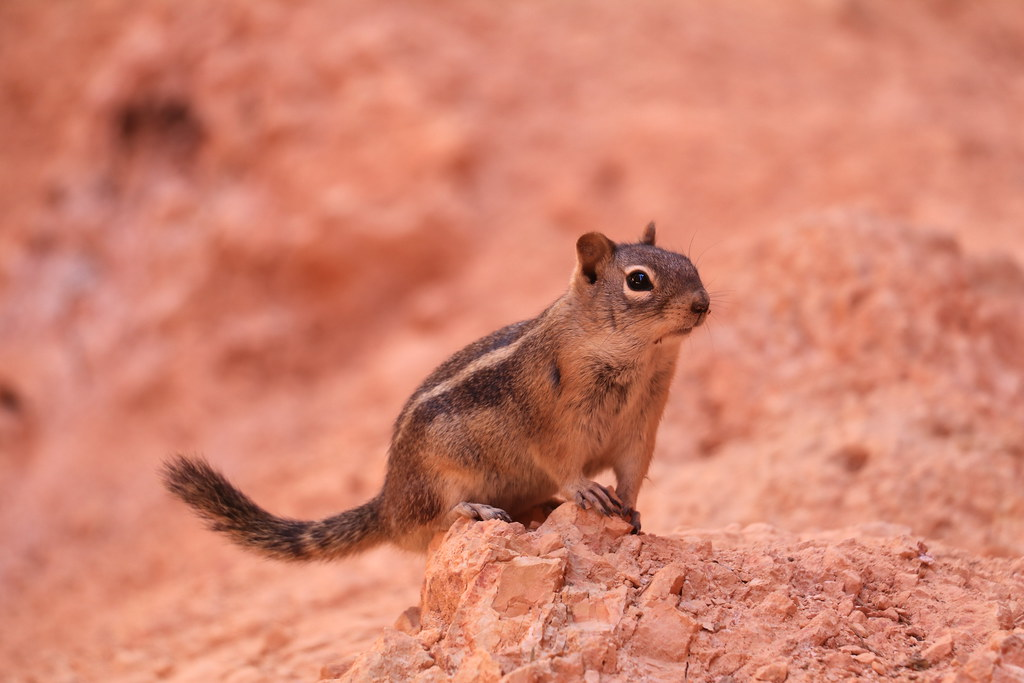

## Theoretical Analysis

St are implemenented in terms of convolutions of the image with kernels of fixed size.

When comparing to the FFT, it is possible to implement convolutions in time O(nlogn).

N being the number of elements. Since for the Canny Edge Detection images are used with dimensions being m x n and n x n (when the width and length are the same size) . The time complexity for these steps would be O(mnlogmn) or O (nlogn) (when they have equal width and length)

The Hyperesis step looks at removing all the high and low values, and discarding pixels that aren't near other pixels which is done in O(mn) time. O(mn) is less than O(mnlogmn) so the overall time complexity would be O(mnlogmn).

### Worst Case: O(mn log mn)

### Average Case: O(mn log mn)

### Space Complexity: O(nm)

## Empirical Time Analysis

### Test 1 - 640 x 517 => n x m = 330880
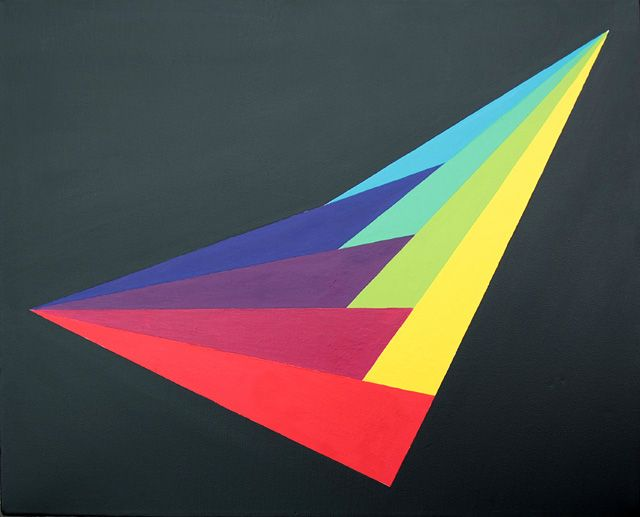

### Test 2 - 544 x 529 => n x m = 287776
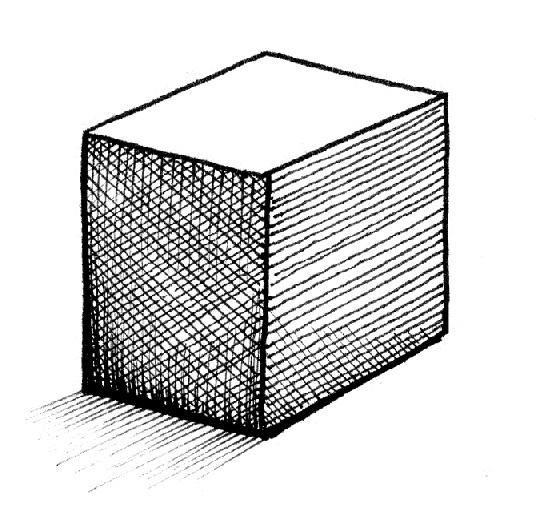

### Test 3 - 450 x 253 => n x m = 113850
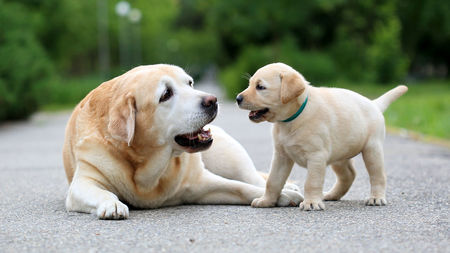

Wall time: 34.3 s


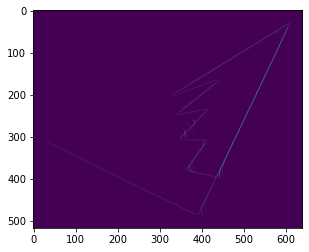

In [59]:
%%time
test1 = cv2.imread(r'C:\Users\wsven\Downloads\example 1.jpg', 0) 

canny(test1)

plt.imshow(canny(test1))

Wall time: 26.1 s


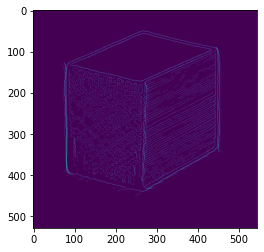

In [60]:
%%time
test2 = cv2.imread(r'C:\Users\wsven\Downloads\example 2.jpg', 0) 

canny(test2)

plt.imshow(canny(test2))

Wall time: 11.8 s


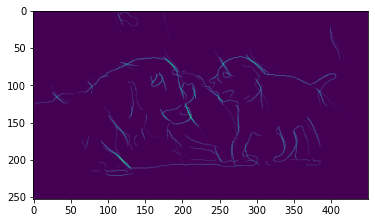

In [61]:
%%time
test3 = cv2.imread(r'C:\Users\wsven\Downloads\example 3.jpg', 0) 
canny(test3)

plt.imshow(canny(test3))

Wall time: 1min 12s


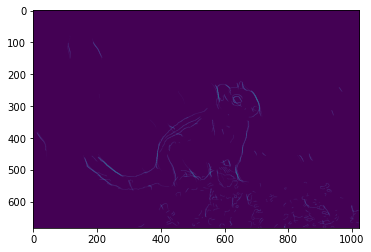

In [62]:
%%time
#Squirrel Image

canny(image)

plt.imshow(canny(image))

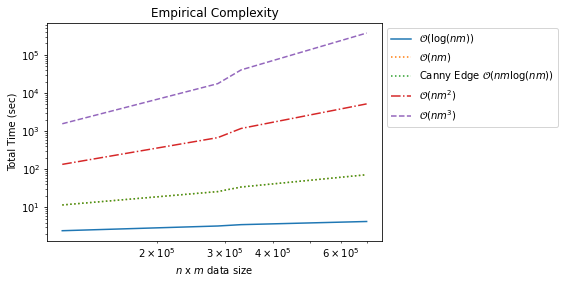

In [67]:
# Plot

NMLIST = [113850,287776,330880,699392]
TimeList = [11.6,26,34.3,72]
df=pd.DataFrame({'n': NMLIST,
                 '$\mathcal{O}(\log(nm))$': [np.log(n) for n in TimeList],
                 '$\mathcal{O}(nm)$':   [n for n in TimeList],
                 'Canny Edge $\mathcal{O}(nm \log(nm))$':  TimeList,
                 '$\mathcal{O}(nm^2)$': [n**2 for n in TimeList],
                 '$\mathcal{O}(nm^3)$': [n**3 for n in TimeList]})

df.set_index('n', drop=True, inplace=True)
df.plot(style=['-',':',':','-.','--'])

plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.title('Empirical Complexity')
plt.xlabel('$n$ x $m$ data size')
plt.ylabel('Total Time (sec)')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Conclusions


In this study, we analyzed and went over the multiple steps of the Canny Edge Detection, an algorithm used for image processing. By going through the multiple steps we were able to assess how the image in transformed and what math is used to determine what is considered an edge pixels. This type of algorithm is traditionally used in grey scale, as that's when it can deliver the best results. First the picture is converted to grayscale, then a Gaussian filter is applied. The next step was to find the intensity gradient and then apply a non-maximum suppression to thin the outlines. Afterwards a double threshold technique was performed. This allowed strong and weak edge pixels to be classified accordingly to the low and high thresholds used. Lastly Hyperesis was used for edge tracking, this allowed for weak pixels to be transformed into strong pixels if they met the condition giving a clearer final output. We then empirically showed that the algorithm can run in O(mnlogmn), where the time it takes to complete is directly proportional to the size of the image (n x m). This is more of a traditional application of Canny's Edge Detection, which is shown to run pretty slow but there continues to be development to improve it's time efficiency. 

# References 
[1] J. Canny, "A Computational Approach to Edge Detection," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. PAMI-8, no. 6, pp. 679-698, Nov. 1986, doi: 10.1109/TPAMI.1986.4767851.

[2] Kuntz, Noah. Canny Tutorial, Drexel University, 2006, www.pages.drexel.edu/~nk752/cannyTut2.html. 

[3] Ramnarayan, Nikita Saklani and Vasundhara Verma. A Review on Edge detection Technique “Canny Edge Detection”. International Journal of Computer Applications 178(10):28-30, May 2019

[4] Moeslund, T. (2009, March 23). Canny Edge Detection. Retrieved December 3, 2014,https://web.archive.org/web/20150421090938/http://www.cse.iitd.ernet.in/~pkalra/csl783/canny.pdf